In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels
import statsmodels.sandbox.stats.multicomp
import pandas as pd
from statsmodels.stats.weightstats import ztest

import matplotlib.pyplot as plt
import seaborn as sns


1. Статкритерии (t-test, z-test) - примеры на выборках разного размера/разных средних/разных дисперсий/разных распределений
Mann-Whitney (пример на малой выборке, на очень разных формах распределения)
2. p-value распределение, проверка мощности и корректности
3. Как проверить выборку на нормальность: qq-plot, критерий Шапиро-Уилка
4. Критерий Колмогорова-Смирнова на соответствие выборки известному распределению

# Критерии: t-test, z-test, Mann-Whithey

In [ ]:
# Нормальное распределение

In [2]:
a_norm = np.random.normal(0, 1, 100)
b_norm = np.random.normal(0, 1, 100)

(array([2., 0., 6., 2., 1., 3., 4., 0., 1., 4., 9., 6., 8., 7., 2., 1., 5.,
        5., 5., 5., 6., 3., 0., 4., 3., 0., 2., 3., 1., 0., 1., 1.]),
 array([-2.11167291, -1.97163136, -1.8315898 , -1.69154824, -1.55150669,
        -1.41146513, -1.27142357, -1.13138202, -0.99134046, -0.8512989 ,
        -0.71125735, -0.57121579, -0.43117424, -0.29113268, -0.15109112,
        -0.01104957,  0.12899199,  0.26903355,  0.4090751 ,  0.54911666,
         0.68915822,  0.82919977,  0.96924133,  1.10928288,  1.24932444,
         1.389366  ,  1.52940755,  1.66944911,  1.80949067,  1.94953222,
         2.08957378,  2.22961533,  2.36965689]),
 <BarContainer object of 32 artists>)

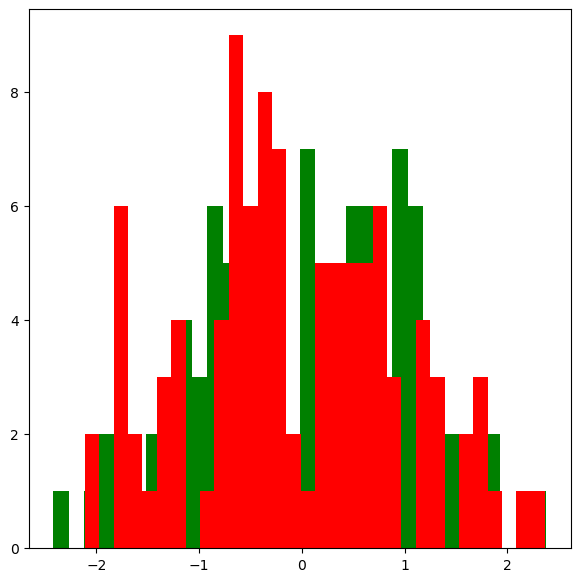

In [3]:
plt.figure(figsize=(7,7))
plt.hist(a_norm, bins = 32, color='green',  linewidth=2)
plt.hist(b_norm, bins = 32, color='red',  linewidth=2)

In [4]:
print(a_norm.mean(), b_norm.mean())

0.00035243832016509214 -0.06697136919280391


In [5]:
print(a_norm.std(), b_norm.std())

0.9839878795108093 1.0167229839296996


Сравним результаты, полученные на разных статкритериях

In [6]:
print(stats.ttest_ind(a_norm, b_norm),'\n')
print(ztest(a_norm, b_norm),'\n')
print(stats.mannwhitneyu(a_norm, b_norm))

Ttest_indResult(statistic=0.47343330958748536, pvalue=0.6364256254044636) 

(0.47343330958748536, 0.6359040701384484) 

MannwhitneyuResult(statistic=5218.0, pvalue=0.5951159299415455)


Видим, что для выборки из нормального распределения t-test и z-test дали практически идентичные результаты

Попробуем поменять параметры распределения: размеры выборок, средние, дисперсии

In [7]:
a_norm = np.random.normal(0, 1, 1000)
b_norm = np.random.normal(0, 1, 1000)

In [8]:
print(a_norm.mean(), b_norm.mean())

0.03704072491320973 -0.06392670261776334


In [9]:
print(stats.ttest_ind(a_norm, b_norm),'\n')
print(ztest(a_norm, b_norm),'\n')
print(stats.mannwhitneyu(a_norm, b_norm))

Ttest_indResult(statistic=2.3084919955115657, pvalue=0.021073429389653876) 

(2.3084919955115657, 0.02097178753075623) 

MannwhitneyuResult(statistic=526928.0, pvalue=0.03704444264791982)


In [10]:
def get_results_from_various_tests(a, b, alpha=0.05):
    
    ttest_pv = stats.ttest_ind(a, b)[1]
    ztest_pv = ztest(a, b)[1]
    mw_pv = stats.mannwhitneyu(a, b)[1]
    
    return {'ttest': [ttest_pv, ttest_pv < alpha], 'ztest': [ztest_pv, ztest_pv < alpha], 'MW': [mw_pv, mw_pv < alpha]}

Увеличим разницу в средних

In [11]:
a_norm = np.random.normal(50, 10, 1000)
b_norm = np.random.normal(30, 11, 1000)

In [12]:
print(a_norm.mean(), b_norm.mean())

50.487417955207114 29.832109745297245


(array([ 1.,  1.,  1.,  1.,  1.,  2.,  1.,  8., 11., 16., 23., 32., 43.,
        62., 66., 64., 82., 92., 83., 66., 88., 68., 55., 31., 39., 26.,
        18.,  5.,  8.,  1.,  3.,  2.]),
 array([-12.37061962, -10.01776597,  -7.66491233,  -5.31205868,
         -2.95920504,  -0.60635139,   1.74650225,   4.0993559 ,
          6.45220954,   8.80506319,  11.15791683,  13.51077048,
         15.86362412,  18.21647776,  20.56933141,  22.92218505,
         25.2750387 ,  27.62789234,  29.98074599,  32.33359963,
         34.68645328,  37.03930692,  39.39216057,  41.74501421,
         44.09786785,  46.4507215 ,  48.80357514,  51.15642879,
         53.50928243,  55.86213608,  58.21498972,  60.56784337,
         62.92069701]),
 <BarContainer object of 32 artists>)

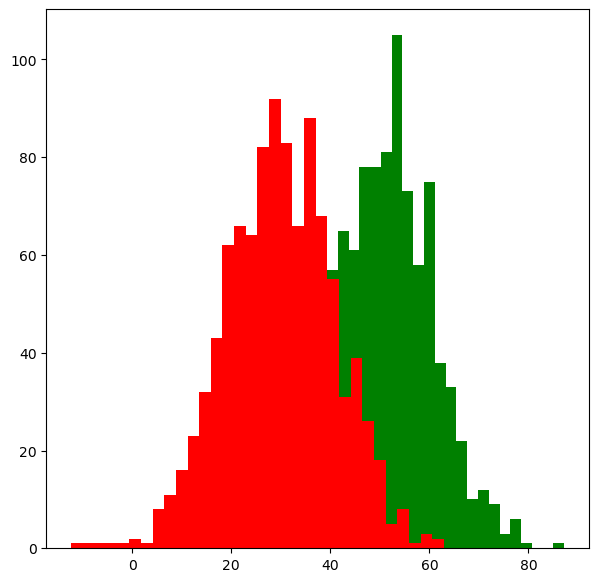

In [13]:
plt.figure(figsize=(7,7))
plt.hist(a_norm, bins = 32, color='green',  linewidth=2)
plt.hist(b_norm, bins = 32, color='red',  linewidth=2)

In [14]:
get_results_from_various_tests(a_norm, b_norm, alpha=0.05)

{'ttest': [9.602897410767225e-293, True],
 'ztest': [0.0, True],
 'MW': [7.069671242763491e-228, True]}

Увеличим дисперсию

In [15]:
a_norm = np.random.normal(50, 350, 1000)
b_norm = np.random.normal(30, 100, 1000)

(array([ 1.,  3.,  2.,  8.,  9.,  8., 14., 31., 33., 38., 54., 66., 56.,
        79., 72., 83., 72., 56., 58., 63., 47., 41., 35., 17., 25.,  9.,
         6.,  5.,  3.,  4.,  1.,  1.]),
 array([-253.14904099, -234.71143932, -216.27383765, -197.83623599,
        -179.39863432, -160.96103265, -142.52343099, -124.08582932,
        -105.64822765,  -87.21062598,  -68.77302432,  -50.33542265,
         -31.89782098,  -13.46021932,    4.97738235,   23.41498402,
          41.85258569,   60.29018735,   78.72778902,   97.16539069,
         115.60299235,  134.04059402,  152.47819569,  170.91579736,
         189.35339902,  207.79100069,  226.22860236,  244.66620402,
         263.10380569,  281.54140736,  299.97900903,  318.41661069,
         336.85421236]),
 <BarContainer object of 32 artists>)

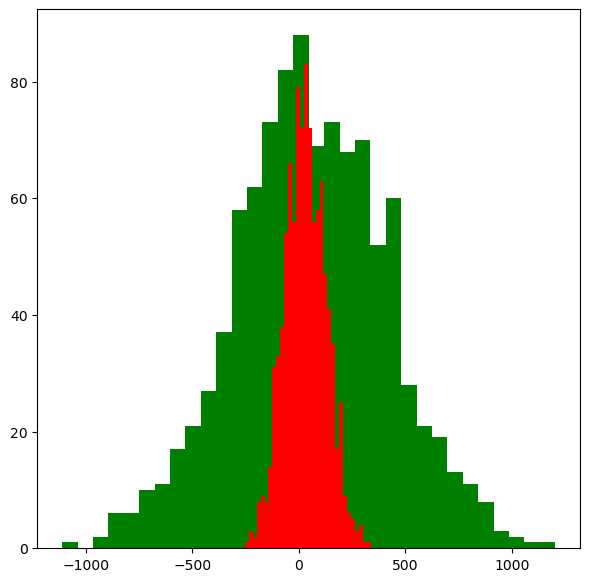

In [16]:
plt.figure(figsize=(7,7))
plt.hist(a_norm, bins = 32, color='green',  linewidth=2)
plt.hist(b_norm, bins = 32, color='red',  linewidth=2)

In [17]:
get_results_from_various_tests(a_norm, b_norm, alpha=0.05)

{'ttest': [0.0281450766172125, True],
 'ztest': [0.02803060274353098, True],
 'MW': [0.07034792910192074, False]}

Возьмем данные не из нормального распределения

In [18]:
a_gamma = np.random.gamma(1, 2, size = 100)
b_gamma = np.random.gamma(1, 2, size = 100)

In [19]:
print(a_gamma.mean(), b_gamma.mean())

2.004434717121875 2.0440285961294267


(array([13., 10., 11., 13.,  6.,  6.,  2.,  3.,  7.,  4.,  2.,  4.,  7.,
         3.,  0.,  3.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02809427, 0.33349679, 0.6388993 , 0.94430181, 1.24970433,
        1.55510684, 1.86050936, 2.16591187, 2.47131439, 2.7767169 ,
        3.08211941, 3.38752193, 3.69292444, 3.99832696, 4.30372947,
        4.60913199, 4.9145345 , 5.21993702, 5.52533953, 5.83074204,
        6.13614456, 6.44154707, 6.74694959, 7.0523521 , 7.35775462,
        7.66315713, 7.96855964, 8.27396216, 8.57936467, 8.88476719,
        9.1901697 , 9.49557222, 9.80097473]),
 <BarContainer object of 32 artists>)

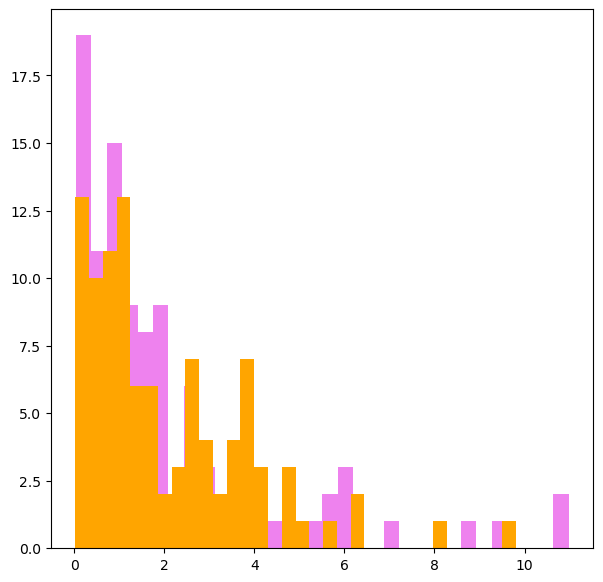

In [20]:
plt.figure(figsize=(7,7))
plt.hist(a_gamma, bins = 32, color='violet',  linewidth=2)
plt.hist(b_gamma, bins = 32, color='orange',  linewidth=2)

In [21]:
get_results_from_various_tests(a_gamma, b_gamma, alpha=0.05)

{'ttest': [0.8926485667583978, False],
 'ztest': [0.8925112980103372, False],
 'MW': [0.34001108017799664, False]}

Увеличим выборки и разницу в параметрах распределения

In [22]:
a_gamma = np.random.gamma(1, 28, size = 1000)
b_gamma = np.random.gamma(1, 24, size = 1000)

In [23]:
print(a_gamma.mean(), b_gamma.mean())

27.072584262893415 23.999249834920832


(array([167., 155., 103.,  91., 104.,  60.,  61.,  62.,  35.,  28.,  30.,
         24.,  21.,   7.,   7.,   8.,   7.,   4.,   6.,   5.,   0.,   1.,
          4.,   0.,   0.,   2.,   1.,   3.,   0.,   2.,   1.,   1.]),
 array([1.32144340e-02, 4.75013015e+00, 9.48704586e+00, 1.42239616e+01,
        1.89608773e+01, 2.36977930e+01, 2.84347087e+01, 3.31716244e+01,
        3.79085401e+01, 4.26454559e+01, 4.73823716e+01, 5.21192873e+01,
        5.68562030e+01, 6.15931187e+01, 6.63300344e+01, 7.10669501e+01,
        7.58038658e+01, 8.05407816e+01, 8.52776973e+01, 9.00146130e+01,
        9.47515287e+01, 9.94884444e+01, 1.04225360e+02, 1.08962276e+02,
        1.13699192e+02, 1.18436107e+02, 1.23173023e+02, 1.27909939e+02,
        1.32646854e+02, 1.37383770e+02, 1.42120686e+02, 1.46857602e+02,
        1.51594517e+02]),
 <BarContainer object of 32 artists>)

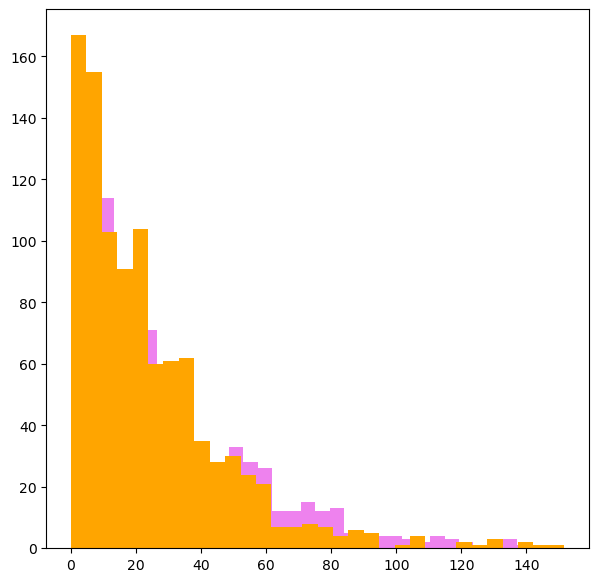

In [24]:
plt.figure(figsize=(7,7))
plt.hist(a_gamma, bins = 32, color='violet',  linewidth=2)
plt.hist(b_gamma, bins = 32, color='orange',  linewidth=2)

In [25]:
get_results_from_various_tests(a_gamma, b_gamma, alpha=0.05)

{'ttest': [0.004657179933190111, True],
 'ztest': [0.004610914506904404, True],
 'MW': [0.027705286546518094, True]}

# Проверим мощность и корректность

Начнем с корректности

# Корректность

In [26]:
def check_correctness(test, dist=np.random.normal, params=[5, 4], alpha=0.05):
    
    p_vals = []
    # iters = 1000
    
    for _ in range(10000):
        a = dist(25, params[0], size=1000)
        b = dist(25, params[1], size=1000)
        p = test(a, b)[1]
        p_vals.append(p)
        
    p_vals = np.array(p_vals)
    
    print(plt.hist(p_vals))
    
    return p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0]

(array([1007., 1050.,  995.,  966., 1029., 1032.,  985.,  977.,  991.,
        968.]), array([6.55940803e-05, 1.00052096e-01, 2.00038597e-01, 3.00025099e-01,
       4.00011600e-01, 4.99998102e-01, 5.99984603e-01, 6.99971105e-01,
       7.99957607e-01, 8.99944108e-01, 9.99930610e-01]), <BarContainer object of 10 artists>)


0.0488

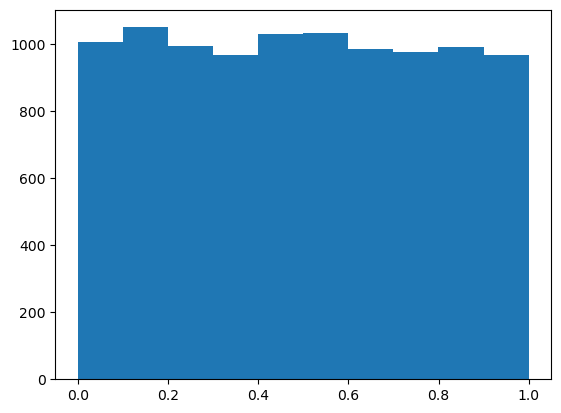

In [27]:
check_correctness(stats.ttest_ind)

В целом, работает корректно

(array([ 993., 1034., 1081., 1008.,  959., 1033., 1023.,  928.,  998.,
        943.]), array([1.52652040e-04, 1.00137387e-01, 2.00122122e-01, 3.00106856e-01,
       4.00091591e-01, 5.00076326e-01, 6.00061061e-01, 7.00045796e-01,
       8.00030530e-01, 9.00015265e-01, 1.00000000e+00]), <BarContainer object of 10 artists>)


0.0517

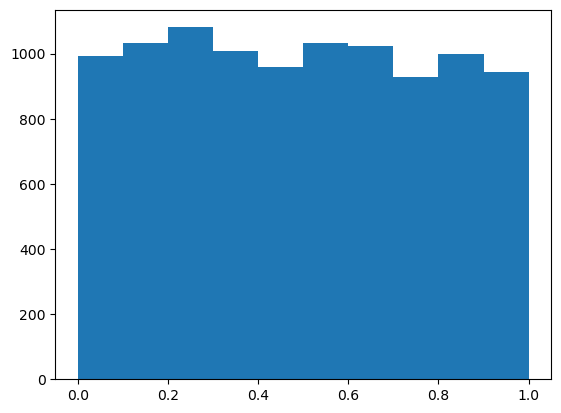

In [28]:
check_correctness(stats.mannwhitneyu)

А тут ошибка уже заметно выше 

Поменяем дисперсии:

(array([1013.,  994.,  970., 1009.,  966., 1003.,  969., 1050., 1003.,
       1023.]), array([2.22120687e-04, 1.00192431e-01, 2.00162741e-01, 3.00133051e-01,
       4.00103361e-01, 5.00073671e-01, 6.00043981e-01, 7.00014291e-01,
       7.99984601e-01, 8.99954911e-01, 9.99925221e-01]), <BarContainer object of 10 artists>)


0.0491

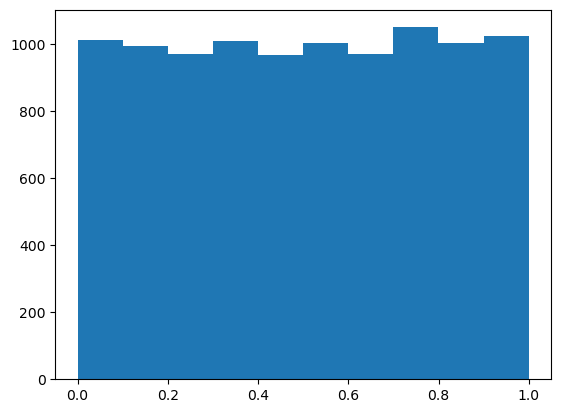

In [29]:
check_correctness(stats.ttest_ind, params=[80, 2])

0.0


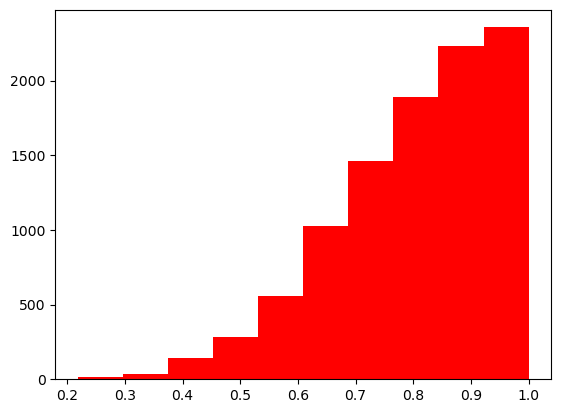

In [30]:
# А если было бы так:

# размер выборок сильно различается

p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 80, size=1000)
    b = np.random.normal(25, 2, size=100)
    p = stats.ttest_ind(a, b).pvalue
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='red')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

0.0489


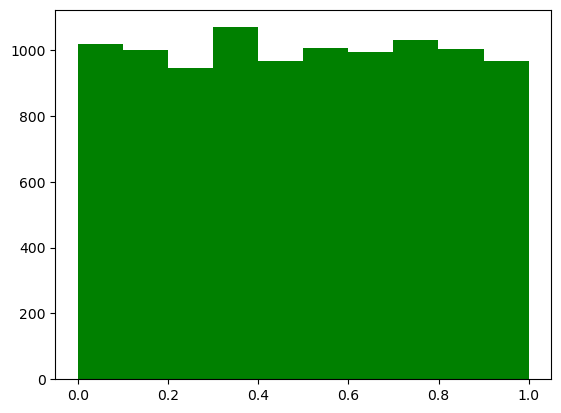

In [31]:
# поэтому пользуемся модификацией теста

p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 80, size=1000)
    b = np.random.normal(25, 2, size=100)
    p = stats.ttest_ind(a, b, equal_var=False).pvalue
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='green')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Проверим на другом распределении:

(array([ 869., 1130., 1249., 1146., 1023.,  983.,  932.,  914.,  877.,
        877.]), array([4.33923528e-04, 1.00388631e-01, 2.00343339e-01, 3.00298046e-01,
       4.00252754e-01, 5.00207462e-01, 6.00162169e-01, 7.00116877e-01,
       8.00071585e-01, 9.00026292e-01, 9.99981000e-01]), <BarContainer object of 10 artists>)


0.0385

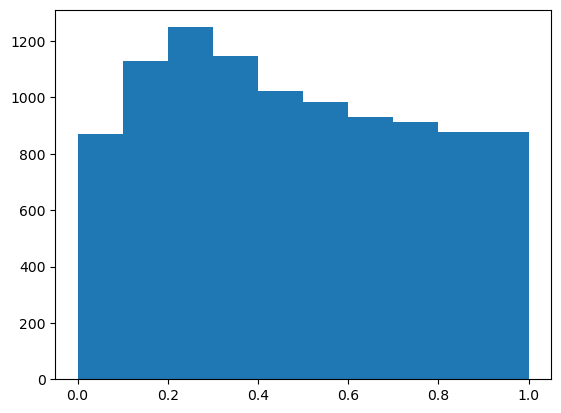

In [32]:
check_correctness(stats.ttest_ind, dist=np.random.lognormal, params=[2, 2])

Ошибка в установленных рамках, но распределение p-value далеко от равномерного

Попробуем другой статкритерий:

(array([ 863., 1206., 1195., 1119., 1124.,  991.,  897.,  878.,  863.,
        864.]), array([3.59217750e-04, 1.00299460e-01, 2.00239701e-01, 3.00179943e-01,
       4.00120185e-01, 5.00060427e-01, 6.00000669e-01, 6.99940911e-01,
       7.99881152e-01, 8.99821394e-01, 9.99761636e-01]), <BarContainer object of 10 artists>)


0.0363

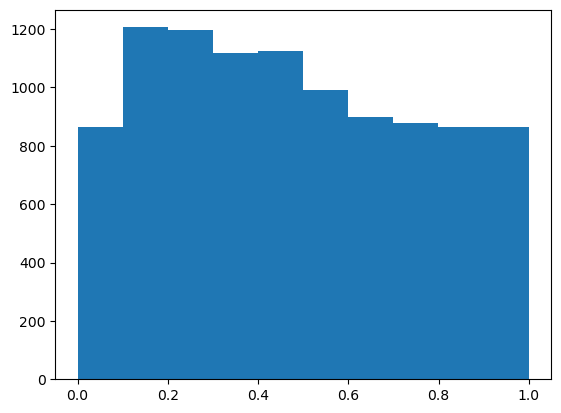

In [33]:
check_correctness(ztest, dist=np.random.lognormal, params=[2, 2])

(array([1045., 1028.,  955., 1031.,  979., 1005.,  996., 1032.,  937.,
        992.]), array([3.09441030e-05, 1.00027850e-01, 2.00024755e-01, 3.00021661e-01,
       4.00018566e-01, 5.00015472e-01, 6.00012378e-01, 7.00009283e-01,
       8.00006189e-01, 9.00003094e-01, 1.00000000e+00]), <BarContainer object of 10 artists>)


0.0532

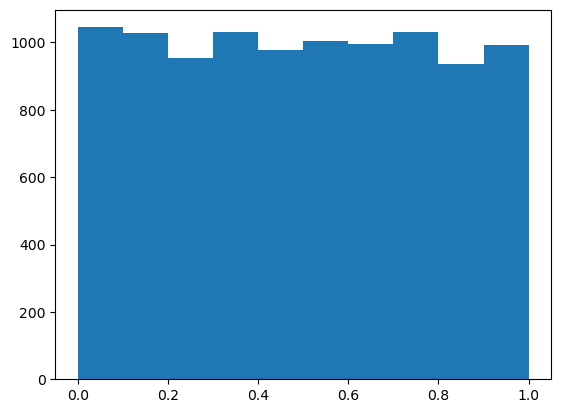

In [34]:
check_correctness(stats.mannwhitneyu, dist=np.random.lognormal, params=[2, 2])

Ошибка заметно выше, но распределение равномернее

Почему ошибка выше?

Каким будем пользоваться критерием в итоге?

Попробуем посмотреть на выборках разного размера:

0.0475


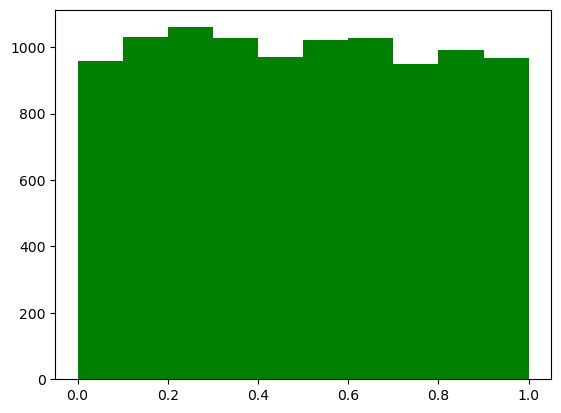

In [35]:
p_vals = []
# iters = 1000
    
for _ in range(10000):
    a = np.random.lognormal(25, 2, size=1000)
    b = np.random.lognormal(25, 2, size=100)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='green')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

0.0473


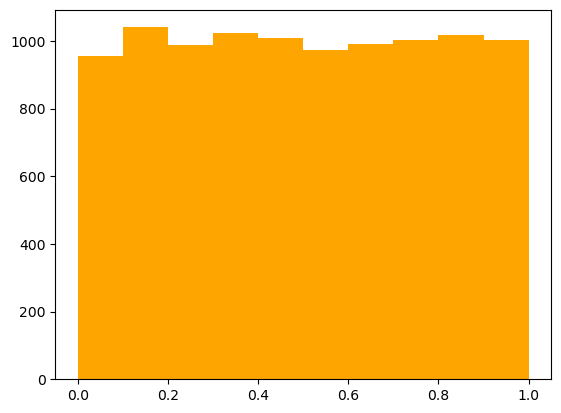

In [36]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.exponential(2, size = 1000)
    b = np.random.exponential(2, size = 100)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='orange')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

0.0471


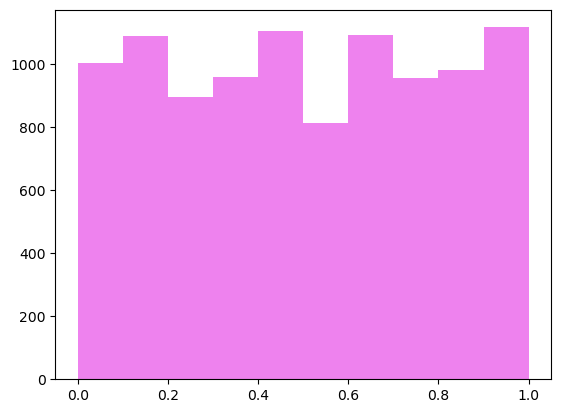

In [39]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.exponential(2, size = 18)
    b = np.random.exponential(2, size = 18)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='violet')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

# Мощность

Проверка мощности связана с вычислением ошибки 2-го рода. Также производится на симуляциях и ресемплинге

0.6084


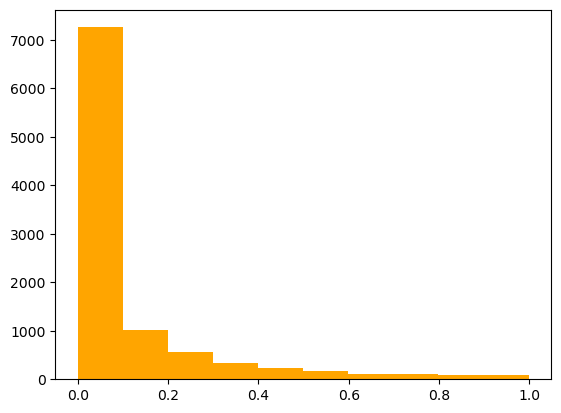

In [40]:
p_vals = []
# iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 10, size = 1000)
    b = np.random.normal(26, 10, size = 1000)
    p = stats.ttest_ind(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='orange')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Попробуем проверить мощность на группах меньшего размера, но с теми же параметрами:

0.1077


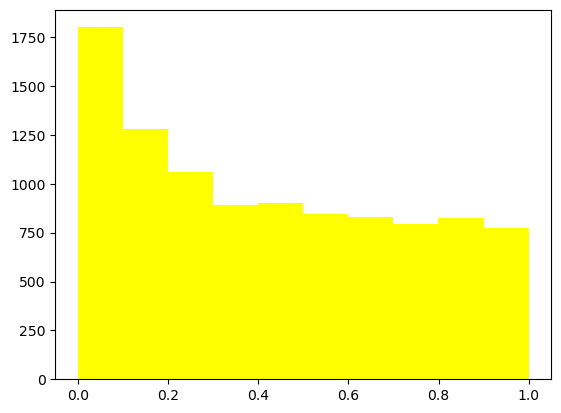

In [41]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 10, size = 100)
    b = np.random.normal(26, 10, size = 100)
    p = stats.ttest_ind(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='yellow')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

А если разница средних будет больше?

0.9423


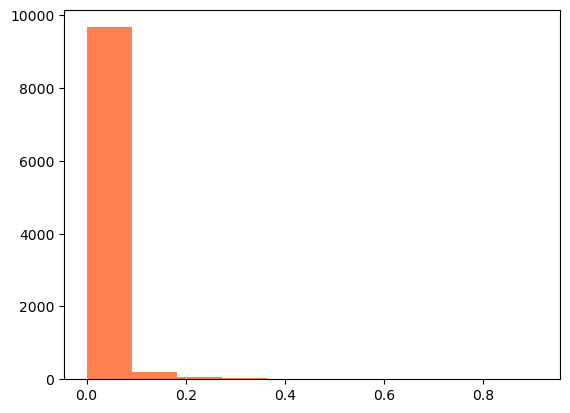

In [42]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 10, size = 100)
    b = np.random.normal(30, 10, size = 100)
    p = stats.ttest_ind(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='coral')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

А если изменим дисперсии?

0.2199


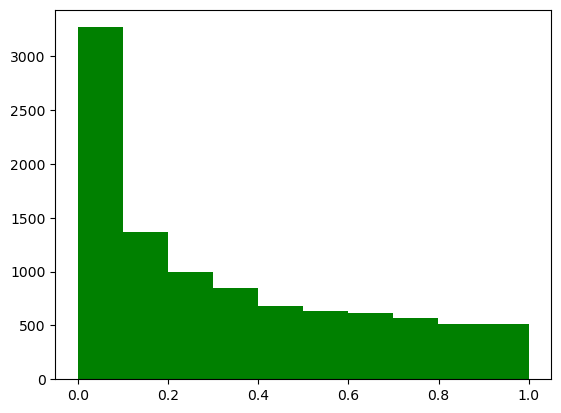

In [43]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 6, size = 100)
    b = np.random.normal(26, 6, size = 100)
    p = stats.ttest_ind(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='green')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

0.0969


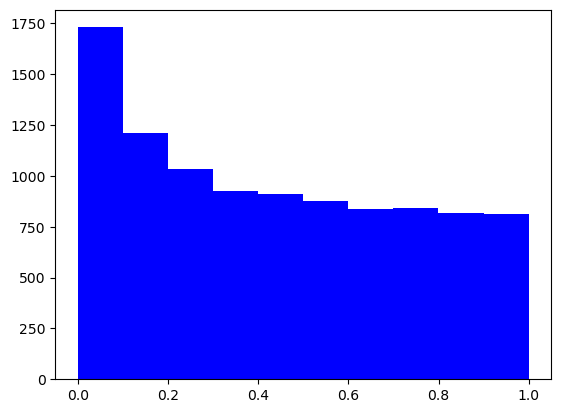

In [44]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 12, size = 1000)
    b = np.random.normal(26, 46, size = 1000)
    p = stats.ttest_ind(a, b, equal_var=False)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='blue')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Увеличиваем дисперсии - падает мощность

0.2549


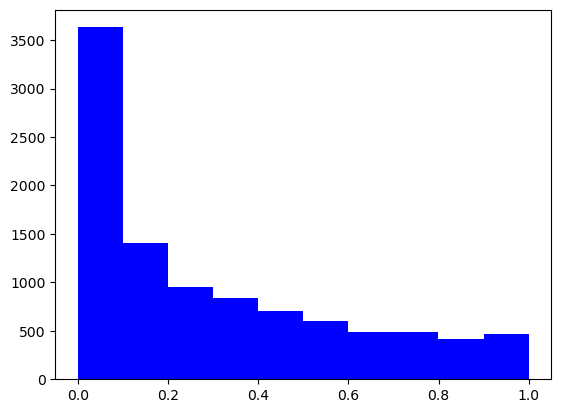

In [45]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 6, size = 1000)
    b = np.random.normal(26, 24, size = 1000)
    p = stats.ttest_ind(a, b, equal_var=False)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='blue')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Уменьшили дисперсии (но оставили различные в группах) - выросла мощность

Попробуем с другим статкритерием:

0.2681


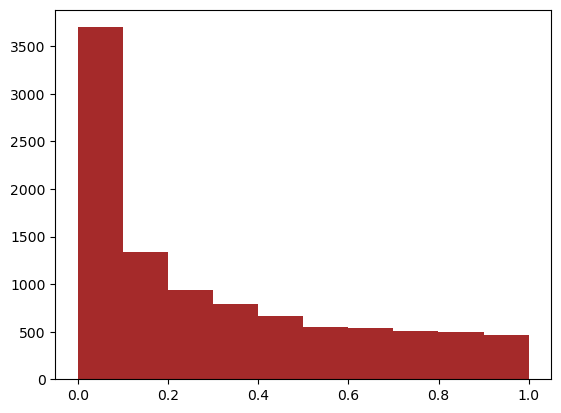

In [46]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 6, size = 1000)
    b = np.random.normal(26, 24, size = 1000)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='brown')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

Сравним мощность разных критериев для НЕномального распределения

0.915


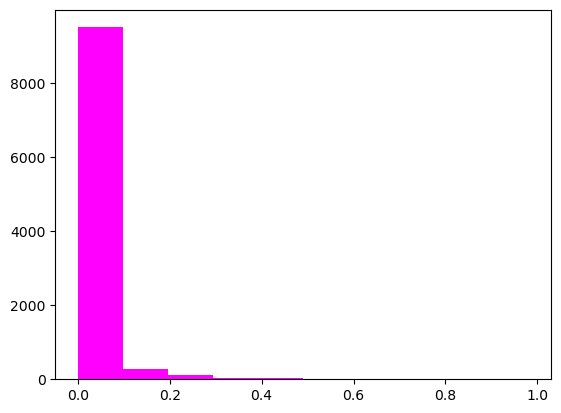

In [47]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.lognormal(25, 6, size = 1000)
    b = np.random.lognormal(26, 7, size = 1000)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='magenta')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

0.0773


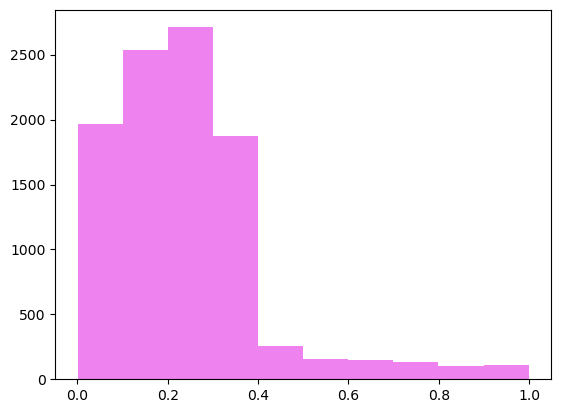

In [48]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.lognormal(25, 6, size = 1000)
    b = np.random.lognormal(26, 7, size = 1000)
    p = stats.ttest_ind(a, b, equal_var=False)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
  
plt.hist(p_vals, color='violet')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])

# Проверка на нормальность

Можно просто построить гистограмму:

(array([  3.,   8.,  37.,  73., 131., 111.,  78.,  42.,  10.,   7.]),
 array([-8.52622768,  0.9796145 , 10.48545668, 19.99129886, 29.49714103,
        39.00298321, 48.50882539, 58.01466756, 67.52050974, 77.02635192,
        86.5321941 ]),
 <BarContainer object of 10 artists>)

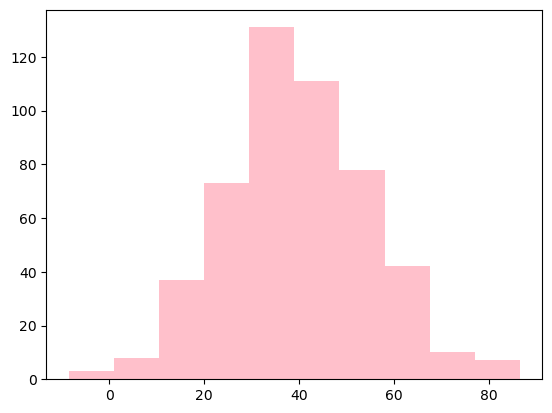

In [49]:
data = np.random.normal(40, 15, size=500)
plt.hist(data, color='pink')

А можно использовать более точные методы:

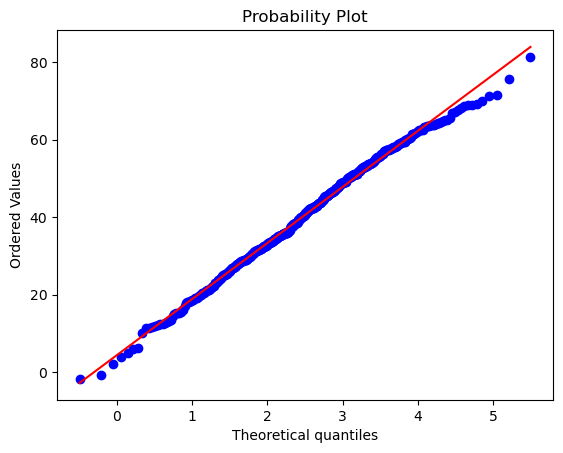

In [50]:
data = np.random.normal(40, 15, size=500)
fig = plt.figure()
ax = fig.add_subplot(111)
x = data
res = scipy.stats.probplot(x, dist='norm', sparams=(2.5,), plot=ax)
#ax.set_title("Q-Q plot")

In [51]:
# H_0 - распределение нормально

stats.shapiro(data)

ShapiroResult(statistic=0.9954293966293335, pvalue=0.1505540907382965)

Есть и другие тесты на проверку нормальности:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html 

In [52]:
stats.normaltest(data)

NormaltestResult(statistic=4.34863439215929, pvalue=0.11368575225276763)

Попробуем то же самое для данных не из нормального распределения:

In [53]:
data_bin = np.random.binomial(1, 0.1, size =500)

In [54]:
print(stats.normaltest(data_bin))
print(stats.shapiro(data_bin))

NormaltestResult(statistic=322.55319829280495, pvalue=9.087887256752261e-71)
ShapiroResult(statistic=0.3045979142189026, pvalue=1.3871971978783164e-39)


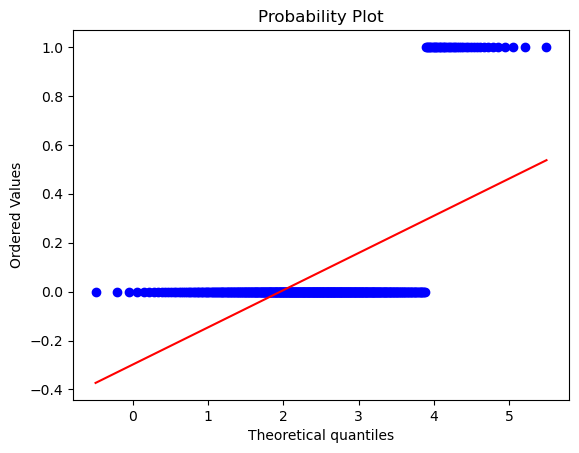

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = data_bin
res = scipy.stats.probplot(x, dist='norm', sparams=(2.5,), plot=ax)

# Проверка на равномерность распределения

(array([66., 46., 53., 49., 44., 48., 52., 46., 57., 39.]),
 array([0.00772274, 0.50552128, 1.00331982, 1.50111836, 1.9989169 ,
        2.49671544, 2.99451398, 3.49231252, 3.99011106, 4.4879096 ,
        4.98570814]),
 <BarContainer object of 10 artists>)

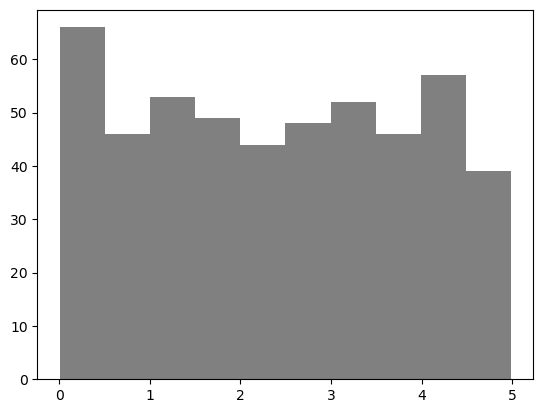

In [57]:
data_uniform = np.random.uniform(0, 5, size=500)
plt.hist(data_uniform, color='grey')

In [58]:
stats.kstest(data_uniform, stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.776, pvalue=4.631964e-318, statistic_location=1.0179936462248889, statistic_sign=-1)

Можно таким образом проверить равномерность распределения p-value:

0.0521
KstestResult(statistic=0.006010815921744683, pvalue=0.8606369835270394, statistic_location=0.8500891840782553, statistic_sign=1)


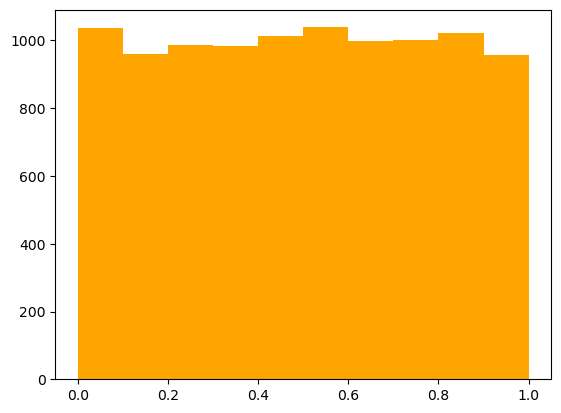

In [59]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.exponential(2, size = 1000)
    b = np.random.exponential(2, size = 100)
    p = stats.mannwhitneyu(a, b)[1]
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='orange')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])
print(stats.kstest(p_vals, stats.uniform(loc=0.0, scale=1.0).cdf))

0.0501
KstestResult(statistic=0.00633388288736314, pvalue=0.8147687464154284, statistic_location=0.38143388288736313, statistic_sign=-1)


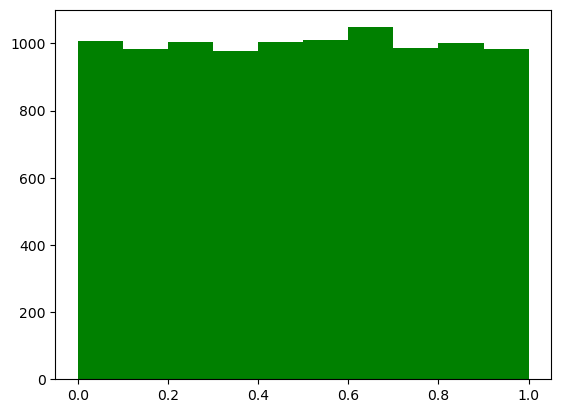

In [60]:
p_vals = []
iters = 1000
    
for _ in range(10000):
    a = np.random.normal(25, 80, size=1000)
    b = np.random.normal(25, 2, size=100)
    p = stats.ttest_ind(a, b, equal_var=False).pvalue
    p_vals.append(p)
        
p_vals = np.array(p_vals)
    
plt.hist(p_vals, color='green')
    
print(p_vals[p_vals < 0.05].shape[0] / p_vals.shape[0])
print(stats.kstest(p_vals, stats.uniform(loc=0.0, scale=1.0).cdf))

# Д3 № 1

1. Проверить работу критериев MW, Z, T на:
- выборках с выбросами размера 1000
- выборках с выбросами размера 100

2. Проверить выполнение ЦПТ для распределений (надо написать функцию):
- нормального
- биномиального
- экспоненциального
- гамма

Проверять каждое для случая 100 и 1000 наблюдений в выборке.

При необходимости можно пользоваться критериями для проверки нормальности распределения

Сделать выводы

3. Просимулировать самостоятельно проверку критерия:
- сгенерировать выборку любого размера и распределения (нормальное распределение не брать!)
- обосновать выбор критерия (или невозможность выбрать критерий)
- посчитать мощность и корректность
- проверить распределение p-value на равномерность